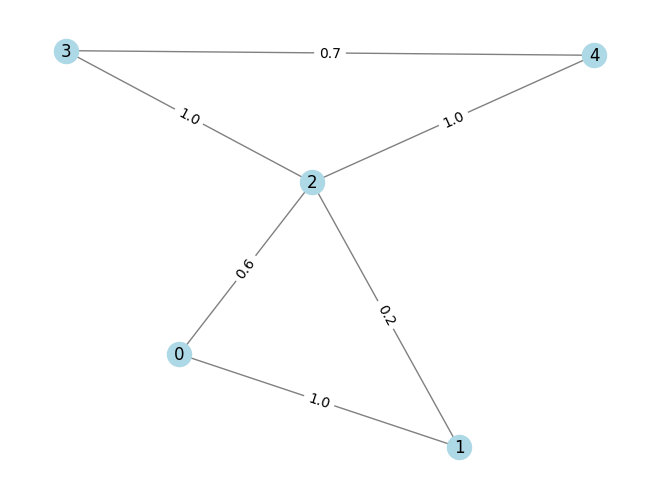

[[0.  1.  0.6 0.  0. ]
 [1.  0.  0.2 0.  0. ]
 [0.6 0.2 0.  1.  1. ]
 [0.  0.  1.  0.  0.7]
 [0.  0.  1.  0.7 0. ]]
Problem name: Max-cut

Maximize
  -2*x_0*x_1 - 1.2*x_0*x_2 - 0.4*x_1*x_2 - 2*x_2*x_3 - 2*x_2*x_4 - 1.4*x_3*x_4
  + 1.6*x_0 + 1.2*x_1 + 2.8*x_2 + 1.7*x_3 + 1.7*x_4

Subject to
  No constraints

  Binary variables (5)
    x_0 x_1 x_2 x_3 x_4

objective function value: 3.6
variable values: x_0=1.0, x_1=0.0, x_2=0.0, x_3=1.0, x_4=1.0
status: SUCCESS


In [2]:
import numpy as np
import utils 
import Qmaxcut
import Cmaxcut
import importlib
importlib.reload(utils)
importlib.reload(Qmaxcut)
importlib.reload(Cmaxcut)

n=np.arange(0, 5, 1)
w_e=[(0, 1, 1.0), (0, 2, 0.6), (1, 2, 0.2), (3, 2, 1.0), (3, 4, 0.7), (4, 2, 1.0)]
G = utils.create_graph(n, w_e)
utils.visualize_graph(G)
prob=utils.encode(G)
utils.classical_max_cut_inbuilt(prob)


In [11]:
def make_hypercube_driver(n): # make the hypercube driver for a system with n qubits
	hyp=np.zeros([2**n,2**n]) # start with all zeros
	for i_op in range(n): # loop through positions
		hyp=hyp-make_ith_operator(np.array([[0,1],[1,0]])
	,n,i_op) # add sigma x operator
	return hyp
H_drive=make_hypercube_driver(3)
psi=np.ones(len(H_drive))/np.sqrt(len(H_drive))
matrix= Cmaxcut.hypercubeHamiltonian(3)
print(matrix)

print(psi)

[[ 0. -1. -1.  0. -1.  0.  0.  0.]
 [-1.  0.  0. -1.  0. -1.  0.  0.]
 [-1.  0.  0. -1.  0.  0. -1.  0.]
 [ 0. -1. -1.  0.  0.  0.  0. -1.]
 [-1.  0.  0.  0.  0. -1. -1.  0.]
 [ 0. -1.  0.  0. -1.  0.  0. -1.]
 [ 0.  0. -1.  0. -1.  0.  0. -1.]
 [ 0.  0.  0. -1.  0. -1. -1.  0.]]
[0.35355339 0.35355339 0.35355339 0.35355339 0.35355339 0.35355339
 0.35355339 0.35355339]
